In [377]:
import pandas as pd
import numpy as np
from datetime import datetime  
from datetime import timedelta  
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt


In [378]:
df = pd.read_csv('loadData.csv')

In [379]:
sampleDest = df.loc[df['DEST'] == '1631881']
sampleDest

,LOAD_ID,BOOKING_DT_TM,ORIG,PKUP_ST_DT_TM,PKUP_END_DT_TM,PKUP_ARRIVAL_ACT_DT_TM,PKUP_DEPARTURE_ACT_DT_TM,DEST,DLVERY_ST_DT_TM,DLVERY_END_DT_TM,DLVERY_ARRIVAL_ACT_DT_TM,DLVERY_DEPARTURE_ACT_DT_TM,MILEAGE
24511,24512,20200610_1400,1809021,20200611_0800,20200611_1500,20200611_1221,20200611_1356,1631881,20200612_0700,20200612_1500,20200612_0529,20200612_0741,320
24514,24515,20200610_1411,1809021,20200612_0800,20200612_1500,20200612_0724,20200612_1011,1631881,20200615_0700,20200615_1500,20200612_1528,20200612_1531,320
24515,24516,20200610_1411,1809021,20200613_0800,20200613_1500,20200613_1129,20200613_1130,1631881,20200615_0700,20200615_1500,20200615_0628,20200615_0715,320
24791,24792,20200612_1706,1809021,20200615_0800,20200615_1500,20200615_1613,20200615_1614,1631881,20200616_0700,20200616_1500,20200616_0815,20200616_0900,320
24792,24793,20200612_1707,1809021,20200616_0800,20200616_1500,20200616_1500,20200616_1722,1631881,20200617_0700,20200617_1500,20200617_0844,20200617_0911,320
24793,24794,20200612_1708,1809021,20200617_0800,20200617_1500,20200617_1633,20200617_1700,1631881,20200618_0700,20200618_1500,20200618_1100,20200618_1127,320
25486,25487,20200620_0720,1809021,20200623_0800,20200623_1500,20200623_1221,20200623_1404,1631881,20200623_0700,20200623_1500,20200624_0642,20200624_0653,320
25621,25622,20200622_1425,1809021,20200624_0800,20200624_1500,20200624_1018,20200624_1228,1631881,20200624_0700,20200624_1500,20200625_0803,20200625_0848,320
25622,25623,20200622_1428,1809021,20200625_0800,20200625_1500,20200625_1541,20200625_1542,1631881,20200625_0700,20200625_1500,20200626_0721,20200626_0733,320
25623,25624,20200622_1428,1809021,20200625_0800,20200625_1500,20200625_0252,20200625_0254,1631881,20200625_0700,20200625_1500,20200625_0817,20200625_0820,320


In [380]:

datatimeList=[]
datetimeobject = datetime.strptime('20200925_0700', '%Y%m%d_%H%M')





Check for difference between planned end time and actual end time

In [381]:
for index, row in sampleDest.iterrows():
    
    datatimeList.append((datetime.strptime(row['DLVERY_DEPARTURE_ACT_DT_TM'], '%Y%m%d_%H%M') 
                        - datetime.strptime(row['DLVERY_END_DT_TM'], '%Y%m%d_%H%M')) > timedelta(seconds=1))

print(len([x for x in datatimeList if x == False])/len(datatimeList))

0.8


About 80% of the actual delivery in location 1631881 is on time

In [382]:
row['PKUP_DEPARTURE_ACT_DT_TM']

'20210310_0940'

In [383]:
s = np.random.normal(35, 5, 1)


In [384]:
ecdf = []
for i in range(len(sampleDest)):
    temp = datetime.strptime(sampleDest['PKUP_DEPARTURE_ACT_DT_TM'].iloc[i], '%Y%m%d_%H%M') - datetime.strptime(sampleDest['PKUP_ARRIVAL_ACT_DT_TM'].iloc[i], '%Y%m%d_%H%M')
    ecdf.append(temp.total_seconds()/60)

Empirical = ECDF(ecdf)


Assuming using first day

In [385]:
simulatedTime = []
for i in range(20):
    
    res = np.random.normal(35, 5, 1)[0]
    res = sampleDest["MILEAGE"].iloc[0]/res
    delta = timedelta(hours=res)
    EmpiricalDelta = (datetime.strptime(sampleDest['PKUP_DEPARTURE_ACT_DT_TM'].iloc[0], '%Y%m%d_%H%M')\
                                    - datetime.strptime(sampleDest['PKUP_ARRIVAL_ACT_DT_TM'].iloc[0], '%Y%m%d_%H%M')).total_seconds()/60
    res = datetime.strptime(sampleDest["PKUP_ST_DT_TM"].iloc[0], '%Y%m%d_%H%M') + delta \
            +timedelta(minutes = Empirical(EmpiricalDelta))

    simulatedTime.append(res)
    

Simulated time for day one using the empirical distribution

In [386]:
simulatedTime

[datetime.datetime(2020, 6, 11, 16, 41, 36, 27951),
 datetime.datetime(2020, 6, 11, 16, 24, 5, 445669),
 datetime.datetime(2020, 6, 11, 18, 55, 22, 342835),
 datetime.datetime(2020, 6, 11, 16, 6, 49, 541740),
 datetime.datetime(2020, 6, 11, 18, 32, 14, 832983),
 datetime.datetime(2020, 6, 11, 19, 31, 55, 729013),
 datetime.datetime(2020, 6, 11, 18, 49, 39, 732929),
 datetime.datetime(2020, 6, 11, 15, 13, 12, 625325),
 datetime.datetime(2020, 6, 11, 18, 23, 25, 738129),
 datetime.datetime(2020, 6, 11, 16, 23, 35, 957723),
 datetime.datetime(2020, 6, 11, 15, 56, 15, 578766),
 datetime.datetime(2020, 6, 11, 15, 28, 8, 820995),
 datetime.datetime(2020, 6, 11, 14, 54, 2, 452558),
 datetime.datetime(2020, 6, 11, 22, 29, 22, 405505),
 datetime.datetime(2020, 6, 11, 18, 7, 5, 619807),
 datetime.datetime(2020, 6, 11, 18, 39, 29, 741004),
 datetime.datetime(2020, 6, 11, 16, 9, 36, 881678),
 datetime.datetime(2020, 6, 11, 16, 50, 39, 699706),
 datetime.datetime(2020, 6, 11, 16, 31, 10, 700101),
 

In [390]:
X=[]
y=[]
for i in range(20):
    X.append((datetime.strptime(sampleDest['DLVERY_END_DT_TM'].iloc[0],'%Y%m%d_%H%M')-simulatedTime[i]).total_seconds()/60)
    y.append(i)
    

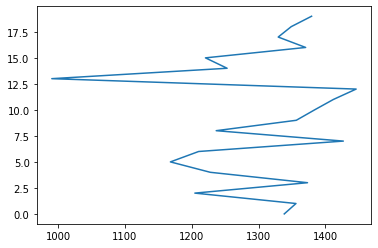

In [391]:
plt.plot(X, y) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]